## Лабораторна робота 6. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя. 

In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
# import plotly.express as px
import seaborn as sns
%matplotlib inline 

import os
import warnings


warnings.filterwarnings('ignore')

**Завдання 0** 

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [2]:
customer_set = pd.read_csv("Mall_Customers.csv")
customer_set.rename(columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "SpendingScore"}, inplace="True")
customer_set.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Завдання 1** 

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка; 
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [3]:
customer_set.columns

Index(['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')

In [4]:
customer_set.shape

(200, 5)

In [5]:
customer_set.describe()

,CustomerID,Age,Income,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
customer_set.isnull().sum()

CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64

## EDA Mall Customers

**Завдання 2** 

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [7]:
customer_set = customer_set.drop('CustomerID', axis=1)
customer_set.head()

,Gender,Age,Income,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


**Завдання 3** 

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

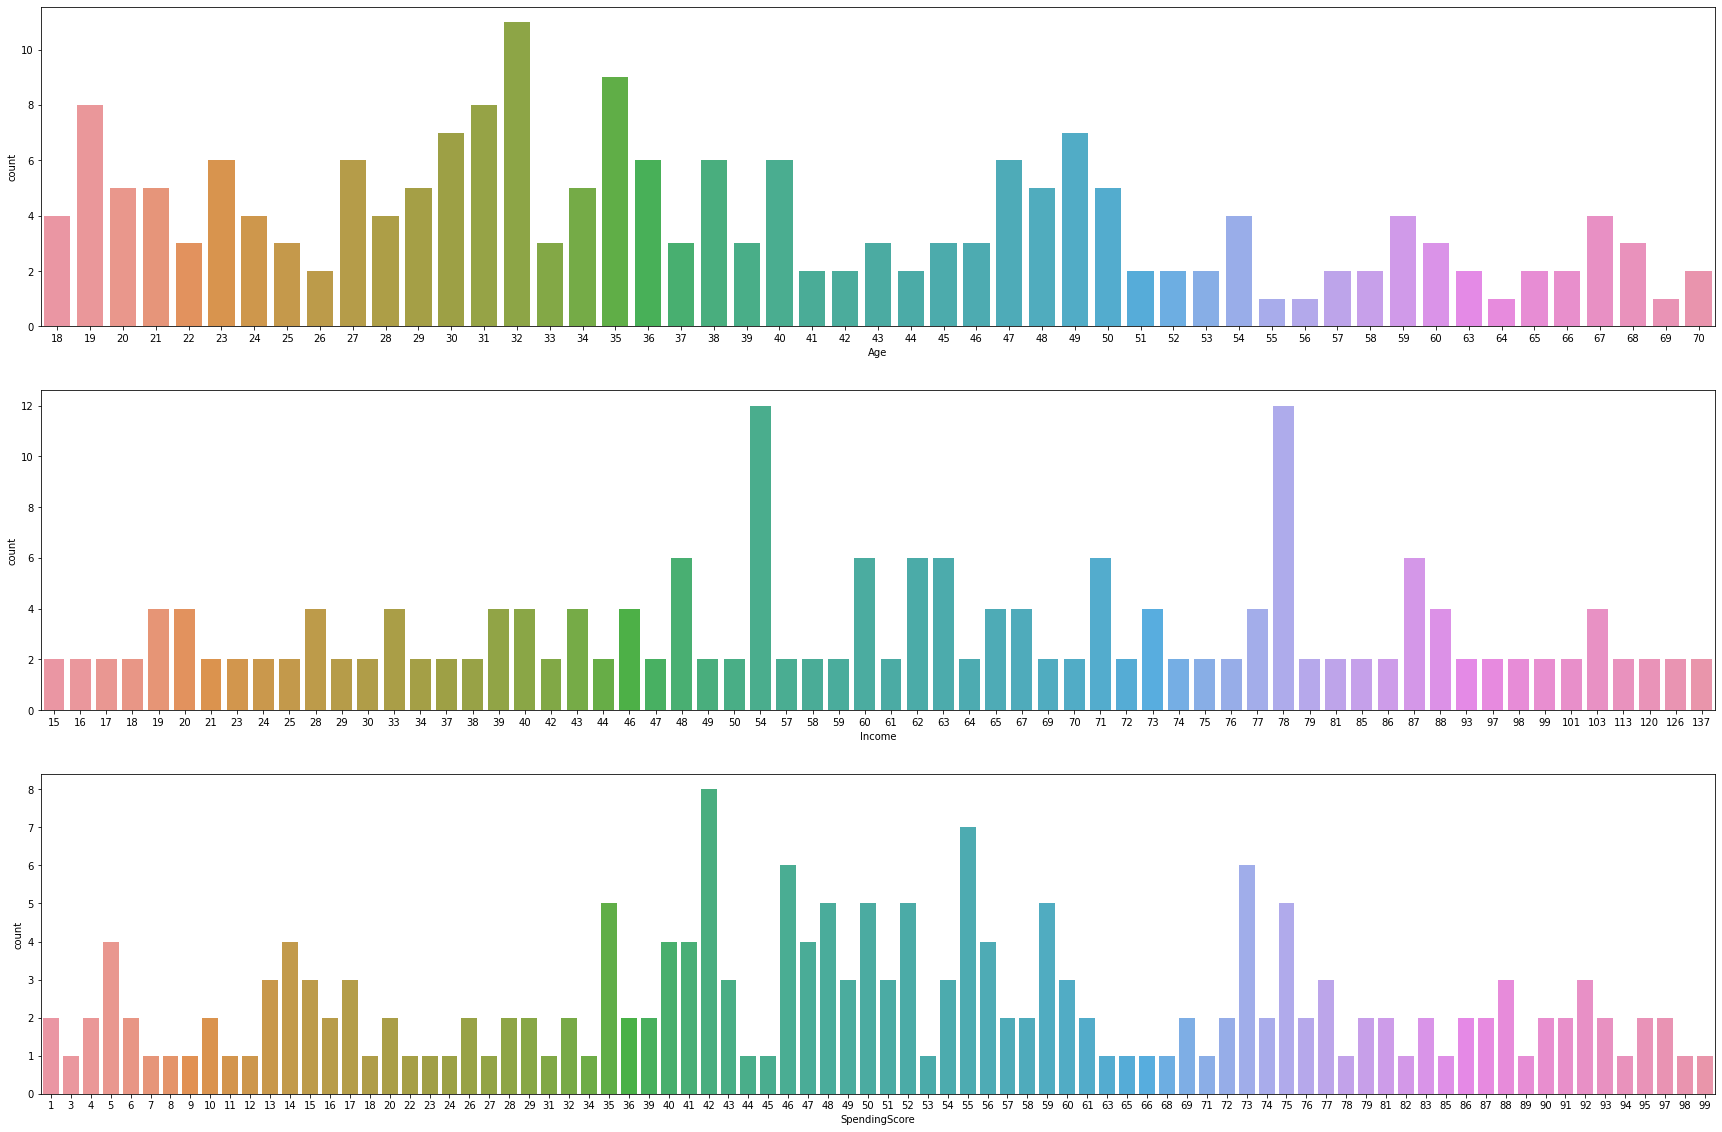

In [8]:
f, ax = plt.subplots(3,1,figsize=(30,20))
sns.countplot(customer_set['Age'], ax=ax[0])
sns.countplot(customer_set['Income'], ax=ax[1])
sns.countplot(customer_set['SpendingScore'], ax=ax[2])
plt.show()

**Завдання 4** 

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`. 
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  
 
* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  
 

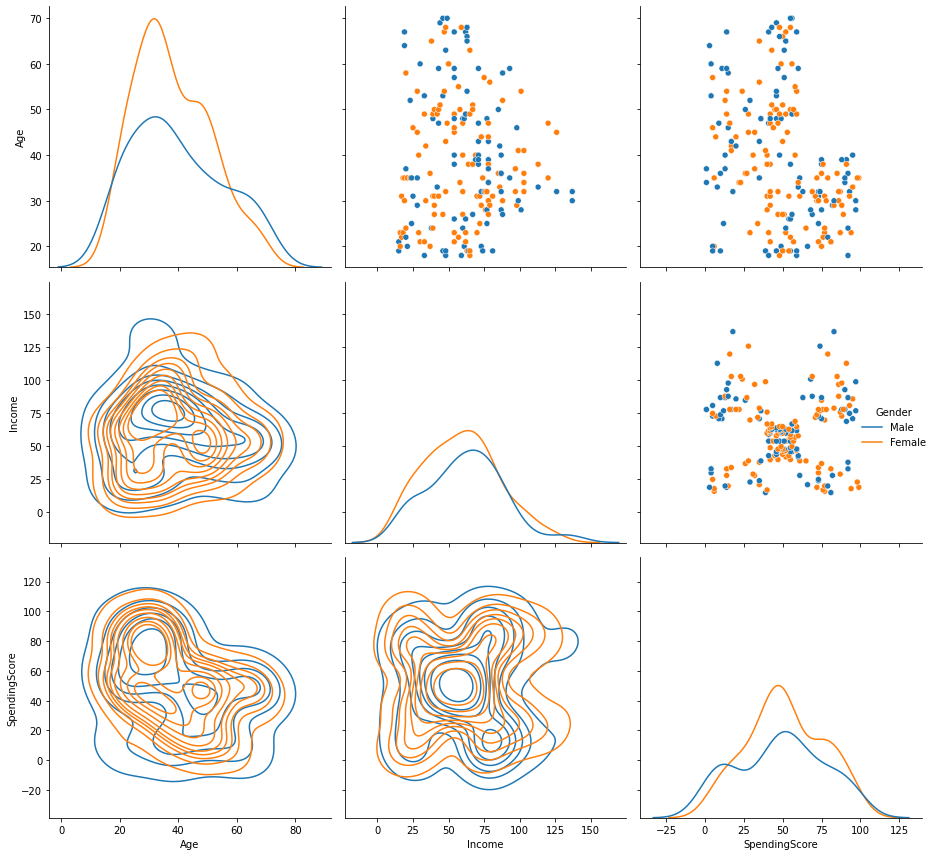

In [9]:
g = sns.PairGrid(customer_set[['Age','Income','SpendingScore','Gender']], hue="Gender", height=4)

g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.map_lower(sns.kdeplot,lw=1)
g.add_legend()

plt.tight_layout()

**Висновки з 1-4 завдання (детальні)**

1. Датасет має 200 рядків, та не має пропусків даних. Змінили назви колонок та видалили `CustomerID`, яка не містить важливої інформації
2. Побудувавши діаграми розподілу не вдалось виявити якусь тенденцію по цих змінних
3. На графіку `pairplot` ми спостергіаємо за тим як відрізняються дані в залежності від статі. За допомогою цього графіка ми зобразили кожен атрибут у трьох різних представленнях.

**Завдання 5** 

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

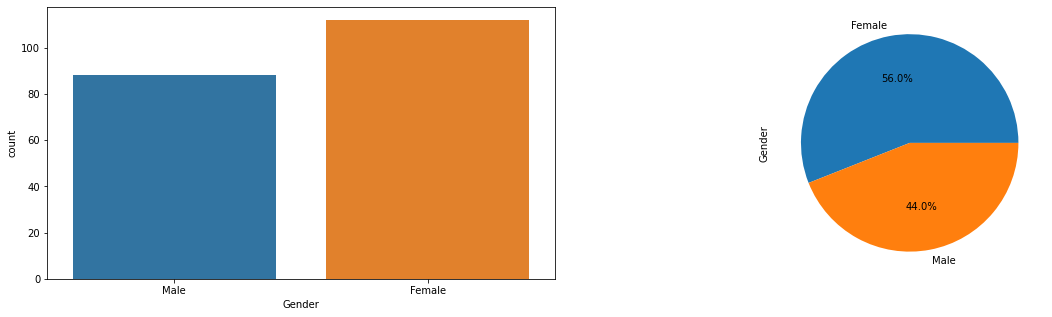

In [10]:
f, ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(customer_set['Gender'], ax=ax[0])
customer_set['Gender'].value_counts().plot.pie(autopct='%.1f%%', ax=ax[1])
plt.show()

**Завдання 6** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

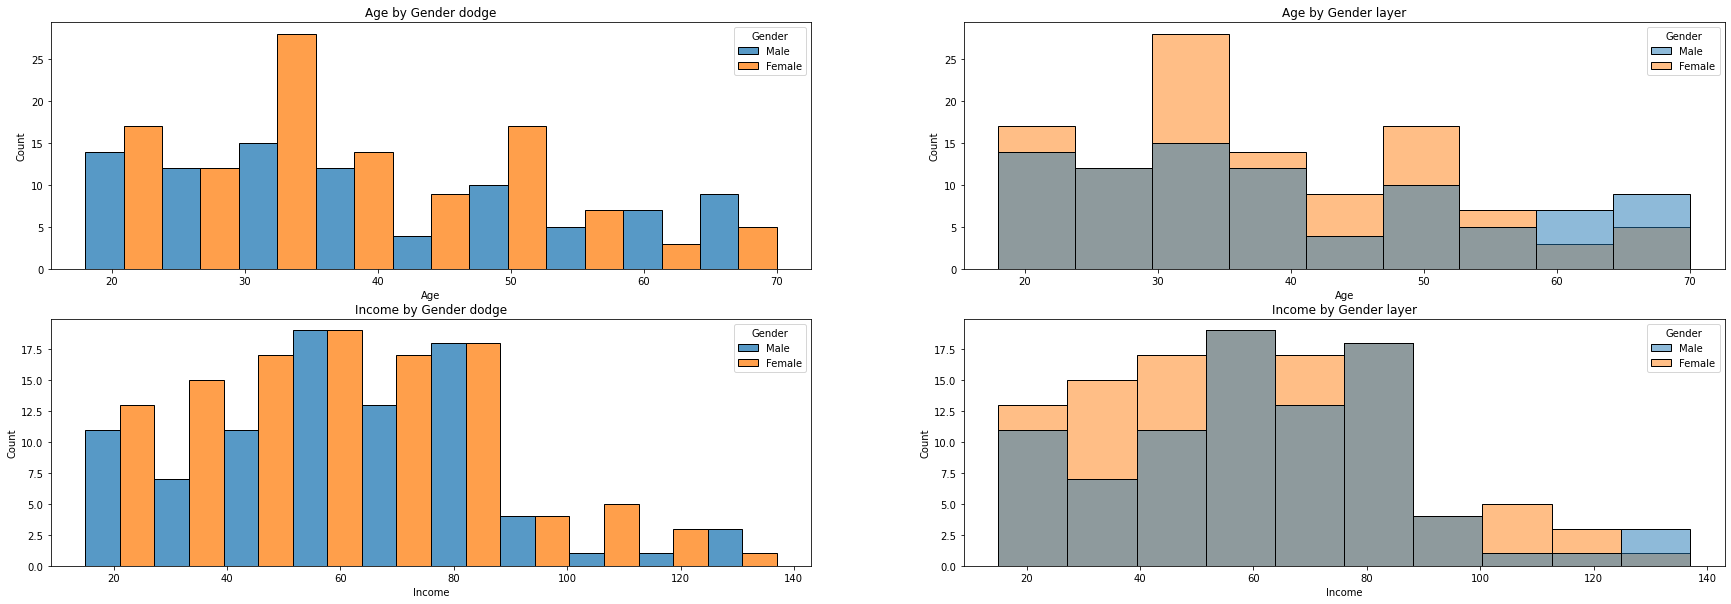

In [11]:
f, ax = plt.subplots(2,2,figsize=(30,10))
sns.histplot(x='Age',data=customer_set, hue='Gender',ax=ax[0,0], multiple='dodge')
ax[0,0].set_title('Age by Gender dodge')
sns.histplot(x='Age',data=customer_set, hue='Gender',ax=ax[0,1], multiple='layer')
ax[0,1].set_title('Age by Gender layer')

sns.histplot(x='Income',data=customer_set, hue='Gender', ax=ax[1,0], multiple='dodge')
ax[1,0].set_title('Income by Gender dodge')
sns.histplot(x='Income',data=customer_set, hue='Gender', ax=ax[1,1], multiple='layer')
ax[1,1].set_title('Income by Gender layer')

plt.show()

**Завдання 7** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`. 



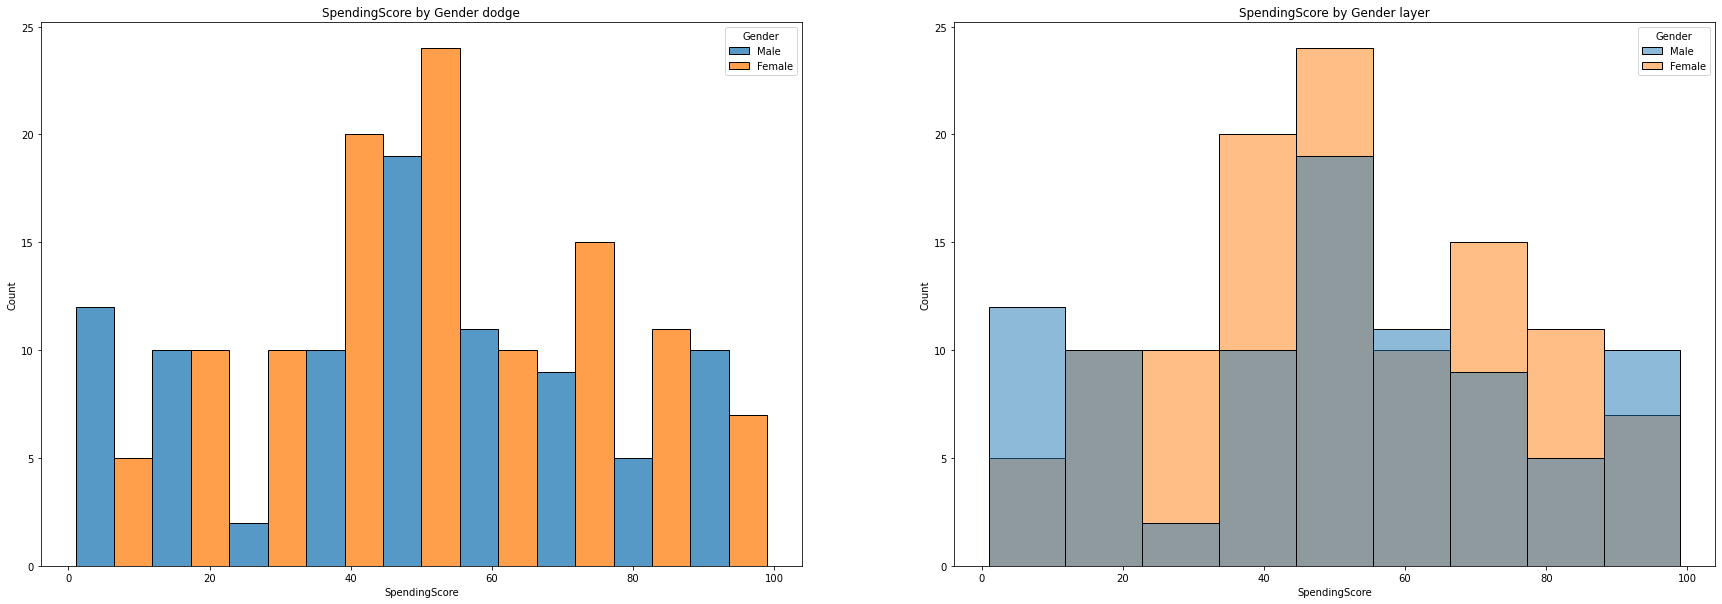

In [12]:
f, ax = plt.subplots(1,2,figsize=(30,10))
sns.histplot(x='SpendingScore',data=customer_set, hue='Gender',ax=ax[0], multiple='dodge')
ax[0].set_title('SpendingScore by Gender dodge')
sns.histplot(x='SpendingScore',data=customer_set, hue='Gender',ax=ax[1], multiple='layer')
ax[1].set_title('SpendingScore by Gender layer')

plt.show()

**Завдання 8** 

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`. 

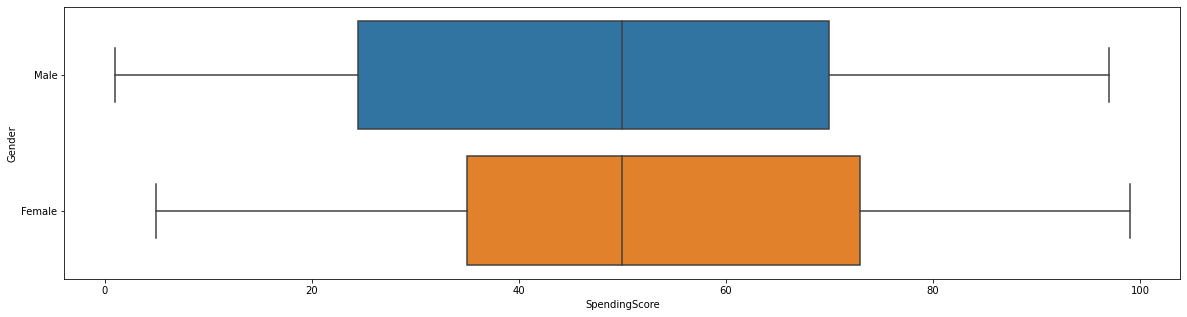

In [13]:
plt.figure(figsize=(20,5))
sns.boxplot(x='SpendingScore', data=customer_set, y='Gender')

plt.show()

**Висновки з завдання 5 - 8(детальні)**

1.   Яке співвідношення груп чоловіків та жінок?

    кількість чоловіків та жінок майже однакова: 56% жінок та 44% чоловіків
    
2.  Подивитись які можна виділити групи і як розподілені витрати відностно статі людини? Чи є різниця між витратами у чоловіків та жінок?
    
    Дивлячись на графік розподілення витрат, можна припустити що жінки витрачають частіше за чоловіків. Також, це можна помітити дивлячись на  `boxplot` - рівень витрат жінок більший ніж чоловіків. Крім цього, можна розбити на дві групи людей - ті хто працюють, та ті хто на пенсії.  Наприклад, на графіку прибутку можемо бачити, що прибуток з віком 80 різко падає.

## K-means Method ##

**Завдання 9** 

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що ... **Чому?**;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

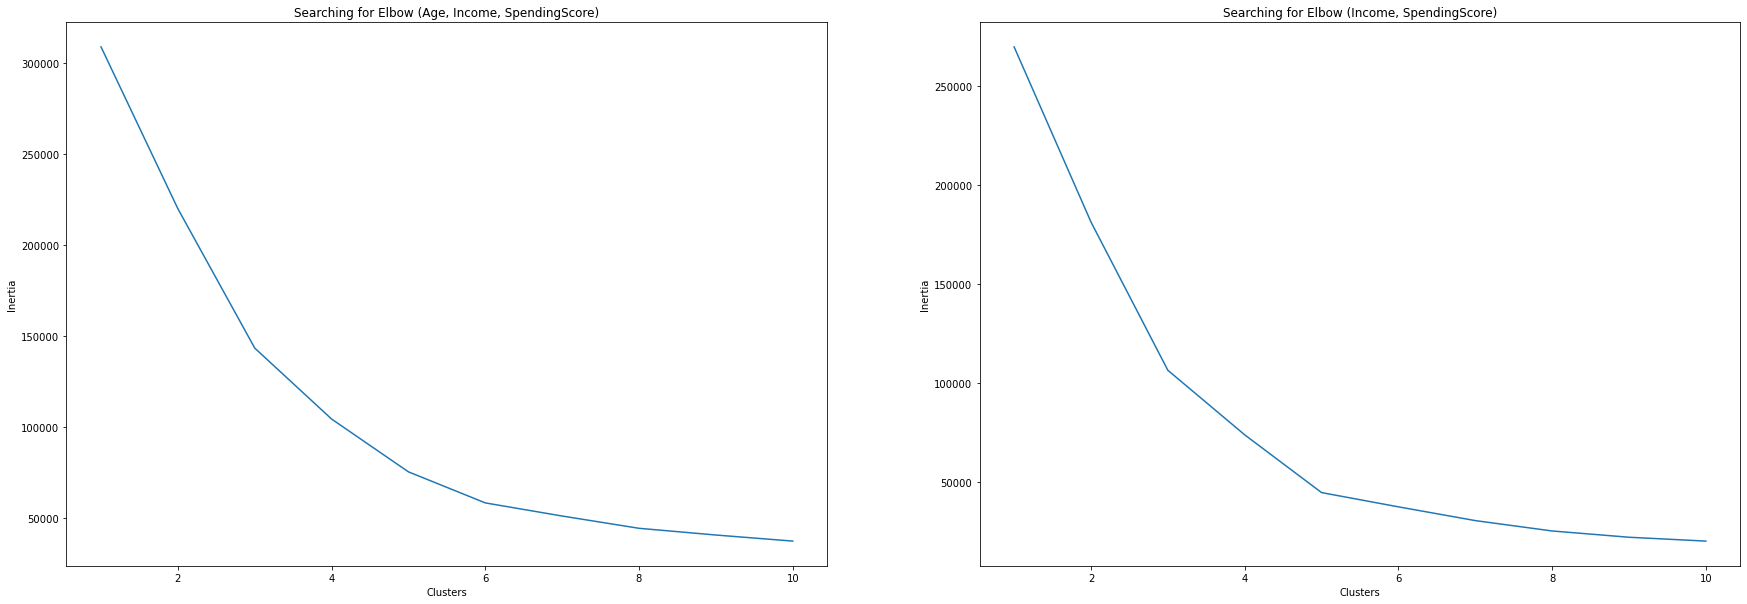

In [14]:
X1 = customer_set.drop(['Gender'], axis=1)
X2 = X1[['Income','SpendingScore']]
clusters = list(range(1, 11))

inertias = [KMeans(n_clusters=k).fit(X1).inertia_ for k in clusters]

f, ax = plt.subplots(1,2,figsize=(30,10))
sns.lineplot(x=clusters, y=inertias, ax=ax[0])
ax[0].set_title('Searching for Elbow (Age, Income, SpendingScore)')
ax[0].set_xlabel('Clusters')
ax[0].set_ylabel('Inertia')

inertias = [KMeans(n_clusters=k).fit(X2).inertia_ for k in clusters]

sns.lineplot(x=clusters, y=inertias, ax=ax[1])
ax[1].set_title('Searching for Elbow (Income, SpendingScore)')
ax[1].set_xlabel('Clusters')
ax[1].set_ylabel('Inertia')

plt.show()

**Висновки з завдання 9 (детальні)** 

1. Видалив змінну `Gender`, бо немає ніякого сенсу кластеризувати категоріальну змінну, яка не впливає на кількість кластерів

2.  Необхідно навести яка кількість кластерів на Вашу думку є оптимальною (краще розглянути для порівняння делька гіпотез про кількість кластерів)

Якщо побудувати графік з даними включно з `Age`, то можна висунути гіпотезу що оптимальна кількість кластерів може бути 5 або 6.
Але якщо досліджувати кількість кластерів за змінними `Income` та `SpendingScore` допомогою методу критерія ліктя, можна визначити, що оптимальна кількість кластерів дорівнює 5, адже на графіку видно, що після п'ятого кластеру спуск стає менш різким. В даному випадку очевидно, що оптимальна кількість кластерів = 5.

**Завдання 10** 

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`. 

In [16]:
#yourCode

**Завдання 11** 

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

In [17]:
#yourCode

**Висновки з завдання 10 - 11 (детальні)** 

1. Визначитась з отриманих візуалізацій яка кількість кластерів є оптимальною на Вашу думку і провести аналіз кластерів, що Ви отримали.
2.   
3. ...

## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12** 

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


In [18]:
#yourCode

**Висновки з завдання 12 (детальні)**

1. 
2.   
3. ...

**Завдання 13** 

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

In [19]:
#yourCode

**Висновки з завдання 13 (детальні)**

1. 
2.   
3. ...